## Data Analysis:
#### Loading the cleaned data:

In [1]:
import pandas as pd

filepath = "../Data_set/Cleaned_Data.csv"
data = pd.read_csv(filepath)
data.head()

,Year,Month,Day,Temperature_2m,Dew_Point_Temperature_2m,Max_Temperature_2m,Min_Temperature_2m,Surface_Temperature,Wind_Speed_10m,Wind_Direction_10m,Wind_Speed_50m,Wind_Direction_50m,Surface_Pressure,Corrected_Precipitation,Relative_Humidity_2m
0,1983,1,1,5.48,-0.01,13.02,-0.81,4.48,2.43,263.62,3.73,265.12,98.23,0.11,70.38
1,1983,1,2,5.80,1.58,12.84,0.74,4.75,3.12,264.19,4.79,263.56,98.09,0.07,76.56
2,1983,1,3,5.43,3.12,11.65,0.27,4.99,3.73,212.50,6.01,212.62,98.47,0.16,84.56
3,1983,1,4,7.59,3.09,14.50,2.96,6.81,3.09,302.56,4.49,303.19,98.57,0.07,75.50
4,1983,1,5,9.02,0.41,18.82,3.52,8.19,4.40,285.00,7.34,285.31,98.22,0.00,58.75


First of all, let's check the variation of the temperature over the  years.

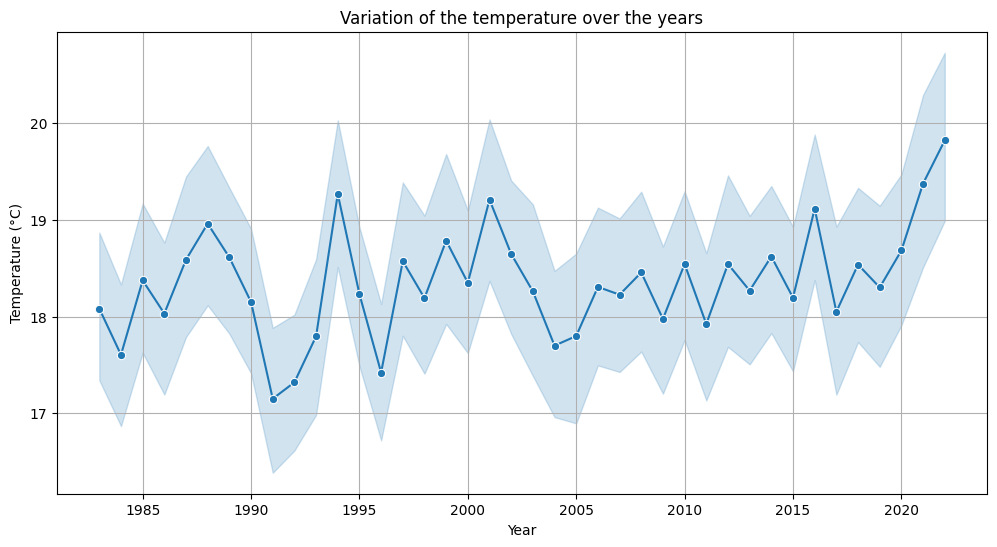

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Temperature_2m', data=data, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Variation of the temperature over the years')
plt.grid(True)

# saving the plot before showing it
plt.savefig('../plots/Temperature_Variation_Over_Years.png', dpi=300, bbox_inches='tight')
plt.show()

**Temperature Variation Analysis:**

- This graph shows the fluctuations in average temperature over time from 1983 to 2022.
- There is an observable increasing trend in temperature, particularly noticeable from 2016 onwards.
- The temperature shows variability with some periods of relative stability and others with more pronounced changes.
- The overall pattern suggests climate warming trends in Tunisia over the analyzed period.

Now let's check the temperature variation in each season, so let's create a new column that indicate which season it is.

In [4]:
data["season"] = pd.cut(data['Month'],
                        bins=[0, 3, 6, 9, 12],
                        labels=['Winter', 'Spring', 'Summer', 'Autumn'],
                        right=False)

seasonal_stats = data.groupby('season').agg({
    'Temperature_2m': ['mean', 'min', 'max'],
    'Wind_Speed_10m': ['mean', 'min', 'max'],
    'Corrected_Precipitation': ['mean', 'sum']
})
print(seasonal_stats)

       Temperature_2m               Wind_Speed_10m               \
                 mean    min    max           mean   min    max   
season                                                            
Winter       9.004456   1.46  20.59       4.260004  1.15  14.61   
Spring      16.632755   3.80  32.56       4.120405  1.04  13.88   
Summer      27.941769  15.13  37.14       3.443462  1.26  11.03   
Autumn      19.414453   4.83  32.50       3.596464  1.08  13.20   

       Corrected_Precipitation           
                          mean      sum  
season                                   
Winter                0.942793  2234.42  
Spring                1.123421  4134.19  
Summer                0.533489  1963.24  
Autumn                1.110956  4043.88  


C:\Users\elham\AppData\Local\Temp\ipykernel_3892\1313054755.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = data.groupby('season').agg({


**Seasonal Statistics Analysis:**

- Temperature varies significantly across seasons, with summer showing the highest averages and winter the lowest.
- Wind speed remains relatively stable throughout the year, with slightly higher values during winter months.
- Precipitation shows seasonal patterns with higher totals typically in autumn and spring.
- The data reveals distinct seasonal contrasts that characterize Tunisia's climate.

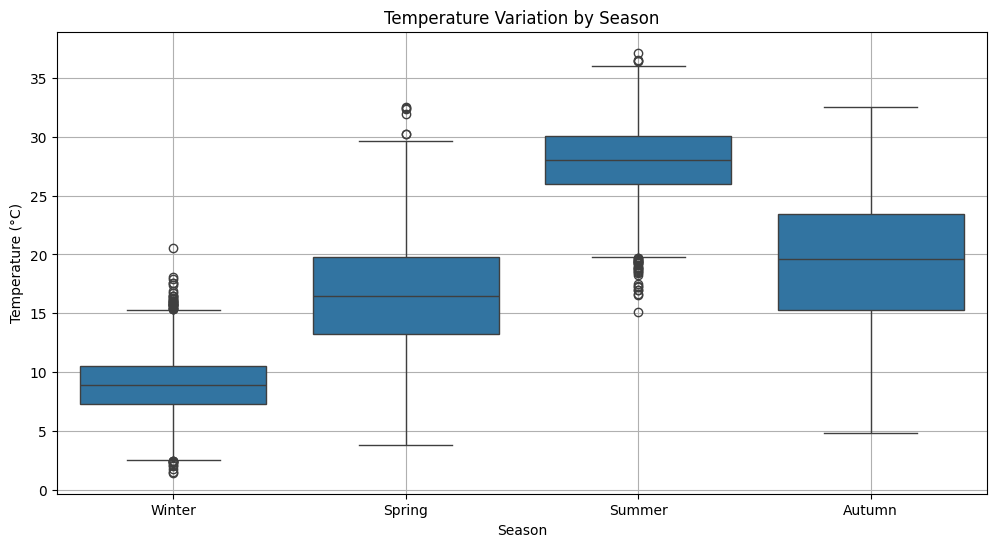

In [5]:
# Seasonal temperature variation boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='Temperature_2m', data=data, order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation by Season')
plt.grid(True)
plt.savefig('../plots/Temperature_Variation_by_Season.png', dpi=300, bbox_inches='tight')
plt.show()

**Seasonal Temperature Distribution Analysis:**

- **Winter**: Temperatures range approximately from 5 to 15°C, with some outliers reaching close to 30°C.
- **Spring**: Temperatures are distributed between about 15 to 25°C, with an outlier close to 0°C.
- **Summer**: Temperatures are concentrated around 25 to 30°C, showing the most consistent high temperatures.
- **Autumn**: Temperatures vary between about 10 to almost 30°C, with an outlier close to 0°C.

The boxplot clearly shows the distinct seasonal temperature patterns in Tunisia's climate.

### Temperature Analysis: Min, Max and Average Variations

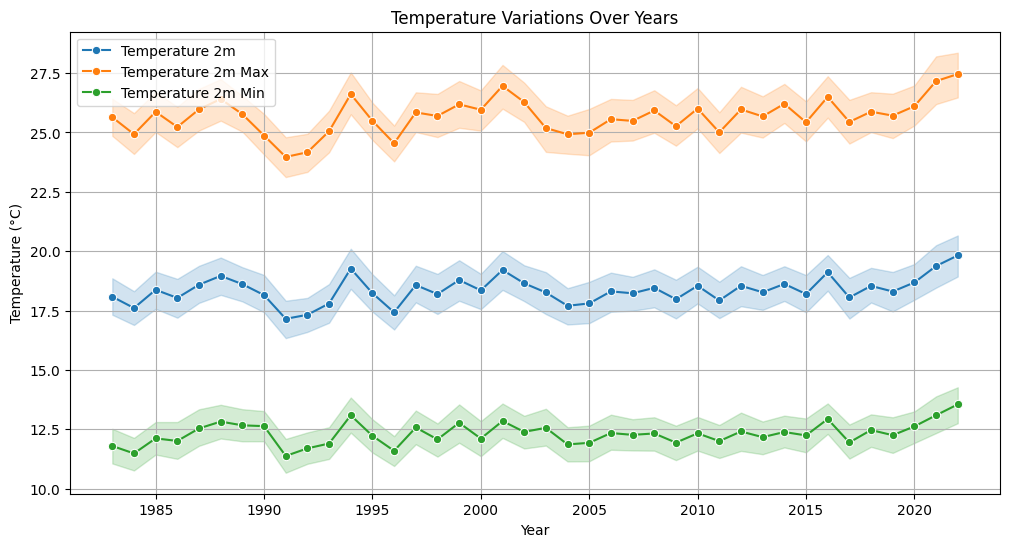

In [7]:
# Temperature variation: min, max, and average over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Temperature_2m', data=data, marker='o', label='Temperature 2m')
sns.lineplot(x='Year', y='Max_Temperature_2m', data=data, marker='o', label='Temperature 2m Max')
sns.lineplot(x='Year', y='Min_Temperature_2m', data=data, marker='o', label='Temperature 2m Min')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variations Over Years')
plt.legend()
plt.grid(True)
plt.savefig('../plots/Temperature_Min_Max_Average_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

**Temperature Variations Analysis:**

This graph represents **the variation of temperatures over the years in Tunisia**. Here's a summary of the data:
- **Temperature 2m (Average Temperature)**: The blue line oscillates between approximately 17.5°C and 22.5°C, representing the average temperature measured at 2 meters above ground level.
- **Temperature 2m Max (Maximum Temperature)**: The orange line oscillates between approximately 22.5°C and just above 27.5°C, indicating the maximum temperatures recorded.
- **Temperature 2m Min (Minimum Temperature)**: The green line oscillates between approximately 10°C and slightly above 15°C, indicating the minimum temperatures recorded.

The graph shows notable trends with increasing temperatures, particularly for maximum values since 2016.

### Monthly Temperature Variations

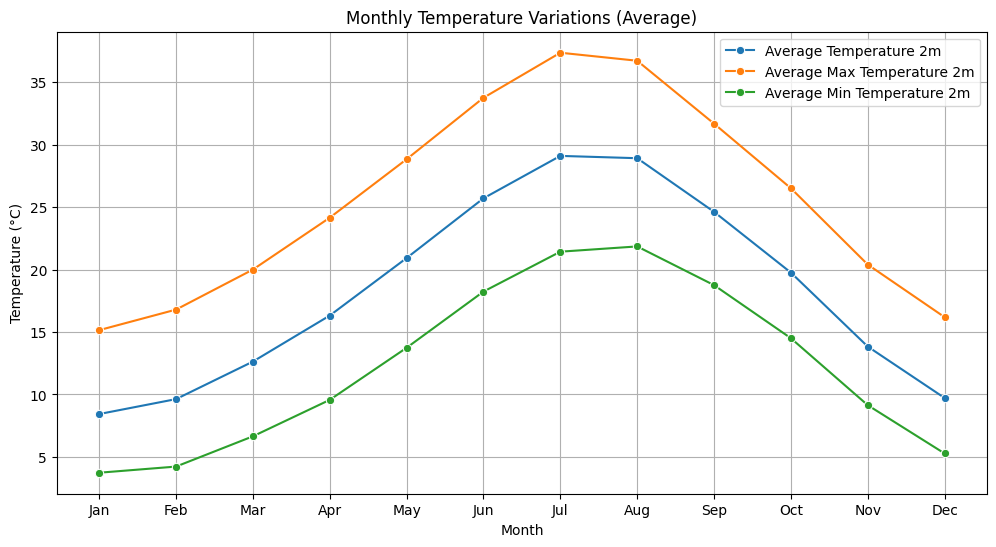

In [9]:
# Calculate monthly average temperatures
monthly_temps = data.groupby('Month').agg({
    'Temperature_2m': 'mean',
    'Max_Temperature_2m': 'mean',
    'Min_Temperature_2m': 'mean'
})

# Monthly temperature variation plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_temps.index, y='Temperature_2m', data=monthly_temps, marker='o', label='Average Temperature 2m')
sns.lineplot(x=monthly_temps.index, y='Max_Temperature_2m', data=monthly_temps, marker='o', label='Average Max Temperature 2m')
sns.lineplot(x=monthly_temps.index, y='Min_Temperature_2m', data=monthly_temps, marker='o', label='Average Min Temperature 2m')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Variations (Average)')
plt.xticks(ticks=monthly_temps.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.savefig('../plots/Monthly_Temperature_Variations.png', dpi=300, bbox_inches='tight')
plt.show()

**Monthly Temperature Analysis:**

The purpose of this graph is not to analyze the monthly variations in temperature, as these are often natural and predictable. Instead, it aims to illustrate that even during traditionally hot months, such as August and June, the temperature can sometimes drop to levels considered abnormally low, like 21°C in June, or reach extreme heat levels approaching 40°C. Similarly, during winter, the month of January can record temperatures below 5°C, which may be unusual.

### Analysis of Extreme Weather Events

Years and Months of Heatwaves:
       Year  Month
157    1983      6
181    1983      7
212    1983      8
243    1983      9
512    1984      5
...     ...    ...
14380  2022      5
14396  2022      6
14426  2022      7
14457  2022      8
14488  2022      9

[189 rows x 2 columns]


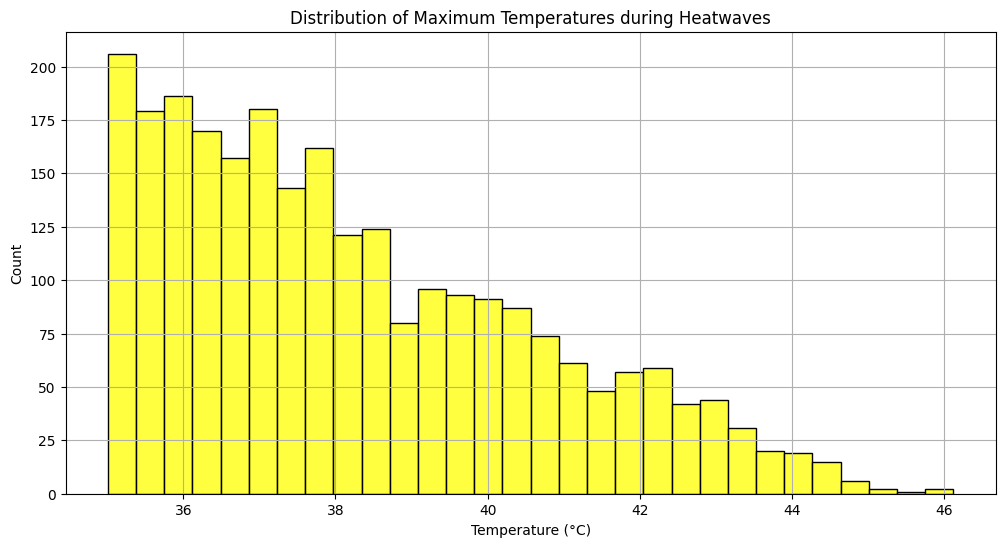

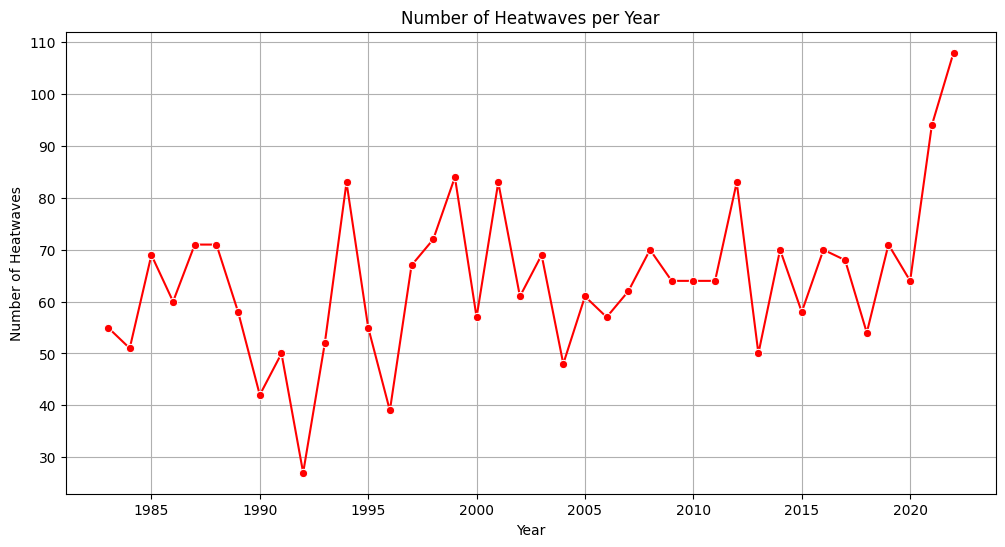

In [10]:
# Identify extreme weather events (heatwaves)
heatwaves = data[data['Max_Temperature_2m'] > 35]  # Define temperature threshold for heatwaves

# Display years and months of heatwaves
print("Years and Months of Heatwaves:")
print(heatwaves[['Year', 'Month']].drop_duplicates().sort_values(by=['Year', 'Month']))

# Distribution of Maximum Temperatures during Heatwaves
plt.figure(figsize=(12, 6))
sns.histplot(data=heatwaves, x='Max_Temperature_2m', bins=30, color='yellow')
plt.xlabel('Temperature (°C)')
plt.title('Distribution of Maximum Temperatures during Heatwaves')
plt.grid(True)
plt.savefig('../plots/Heatwave_Temperature_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the number of heatwaves per year
heatwaves_per_year = heatwaves.groupby('Year').size()

# Plot the number of heatwaves per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=heatwaves_per_year.index, y=heatwaves_per_year.values, marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Heatwaves')
plt.title('Number of Heatwaves per Year')
plt.grid(True)
plt.savefig('../plots/Heatwaves_per_Year.png', dpi=300, bbox_inches='tight')
plt.show()

**Extreme Weather Events Analysis:**

- From the first graph, the most significant heatwaves are observed between 35°C and 38°C, with approximately 1,262 occurrences. However, extreme heatwaves can reach up to 46°C, though these are rare.
- From the second graph, the years 1983 to 1991 experienced between 50 and 71 heatwaves. In 1992, heatwaves reached a minimum of under 30 occurrences. Between 1994 and 2020, the number varies mainly between 50 and 84, with a peak in 2022 recording approximately 110 heatwaves.

### Wind Analysis

#### Temporal Wind Speed Variation:

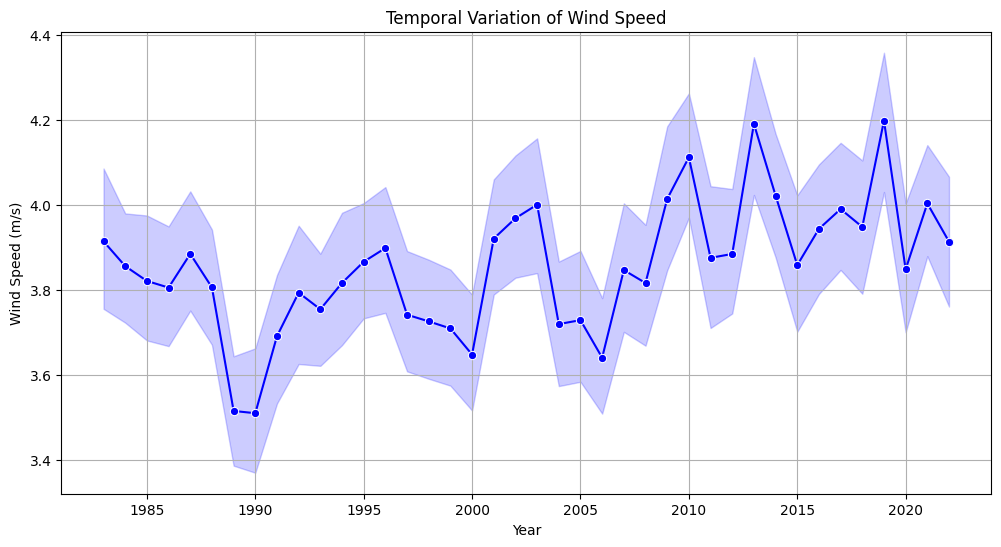

In [11]:
# Temporal wind speed variation plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Wind_Speed_10m', data=data, marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.title('Temporal Variation of Wind Speed')
plt.grid(True)
plt.savefig('../plots/Wind_Speed_Temporal_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

**Wind Speed Temporal Analysis:**

This graph highlights the variations in wind speed, with an average oscillating between 3.6 m/s and 4 m/s. However, it is observed that this range changed from the 2010s, where it fluctuated between a minimum of 3.8 m/s and a maximum of 4.2 m/s.

It is also remarkable that the years 1989 and 1999 stand out, as the minimum wind speed reached 3.4 m/s, while in 2019, the maximum wind speed reached a peak of 4.4 m/s.

#### Monthly Wind Speed Variation:

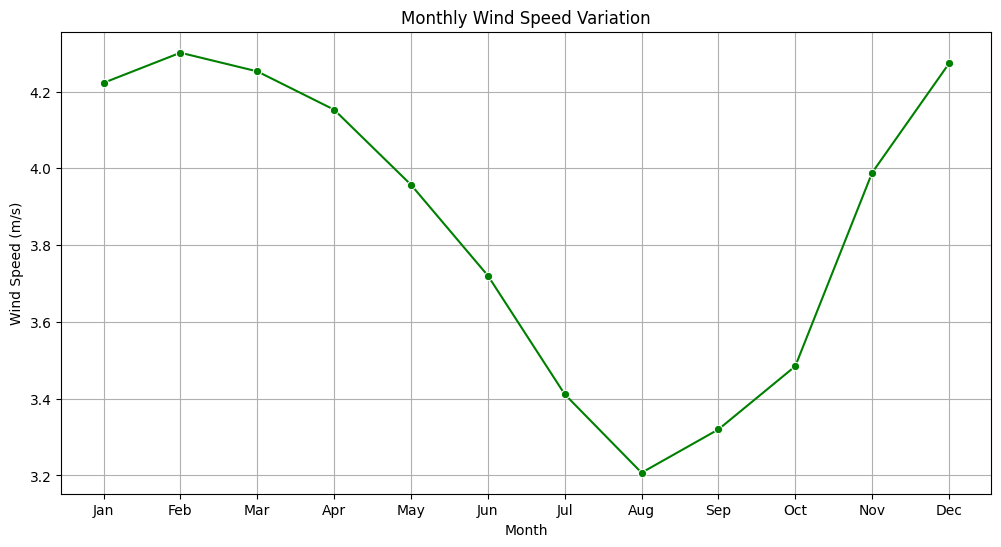

In [12]:
# Calculate monthly average wind speeds
monthly_wind = data.groupby('Month').agg({
    'Wind_Speed_10m': 'mean'
})

# Monthly wind speed variation plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_wind.index, y='Wind_Speed_10m', data=monthly_wind, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Monthly Wind Speed Variation')
plt.xticks(ticks=monthly_wind.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('../plots/Monthly_Wind_Speed_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

**Monthly Wind Speed Analysis:**

This graph highlights the monthly variation in average wind speed. In January, wind speed is highest, slightly exceeding 4 m/s. Conversely, in July, it's at its lowest, dropping to about 3.2 m/s. Finally, in December, wind speed increases again, approaching January values.

### Atmospheric Pressure and Precipitation Analysis

#### Temporal Variation of Atmospheric Pressure:

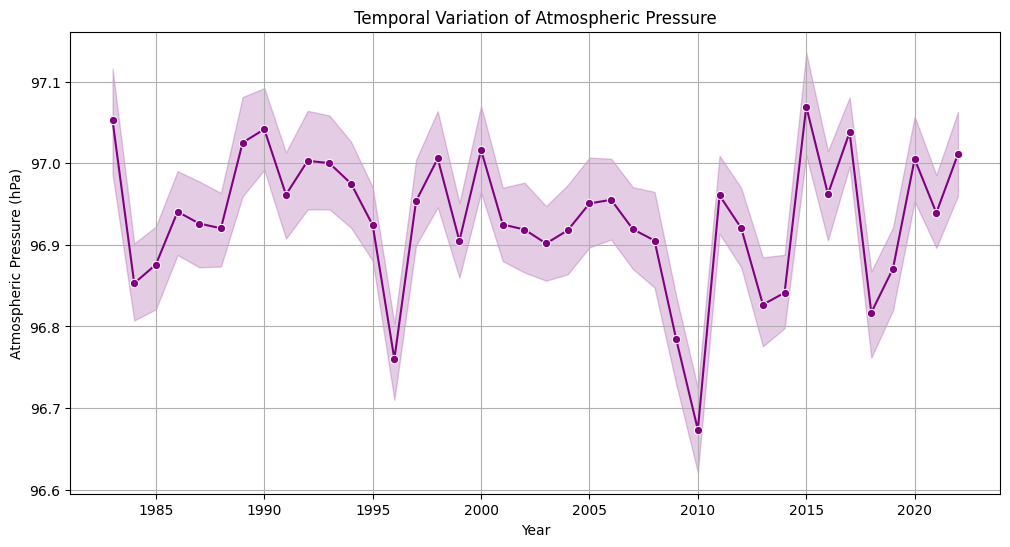

In [13]:
# Temporal atmospheric pressure variation plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Surface_Pressure', data=data, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Temporal Variation of Atmospheric Pressure')
plt.grid(True)
plt.savefig('../plots/Atmospheric_Pressure_Temporal_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

**Atmospheric Pressure Temporal Analysis:**

The atmospheric pressure is the parameter that shows the greatest variation in our study. Indeed, its average varies from 96.85 hPa to 97.02 hPa from 1983 to 2008, with a drop to 96.77 hPa in 1996. In 2010, there is a considerable decrease to 96.68 hPa, followed by an increase to remain between 96.82 hPa and 97.05 hPa thereafter.

#### Monthly Variation of Atmospheric Pressure:

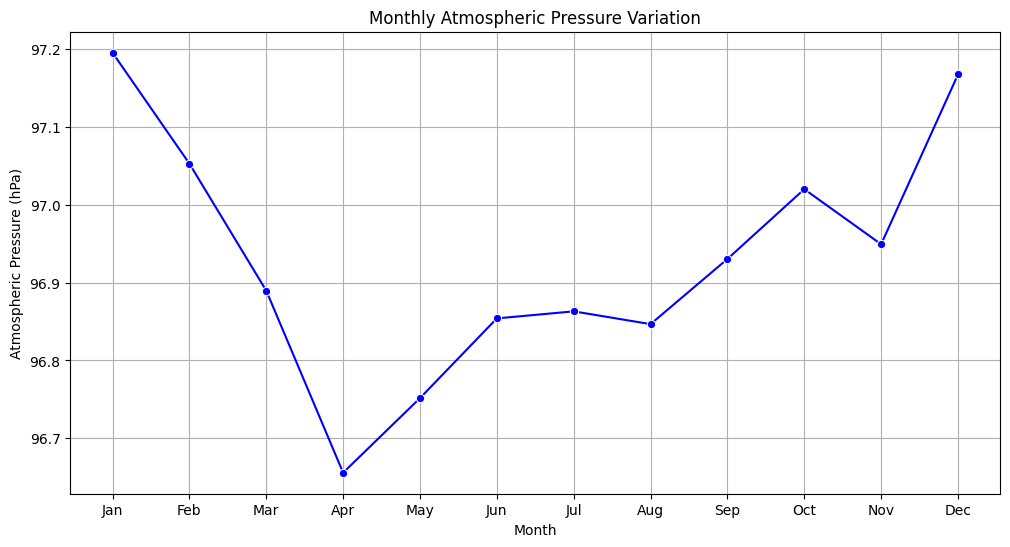

In [14]:
# Calculate monthly average atmospheric pressure
monthly_pressure = data.groupby('Month').agg({
    'Surface_Pressure': 'mean'
})

# Monthly atmospheric pressure variation plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pressure.index, y='Surface_Pressure', data=monthly_pressure, marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Monthly Atmospheric Pressure Variation')
plt.xticks(ticks=monthly_pressure.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('../plots/Monthly_Atmospheric_Pressure_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

### Precipitation Analysis

#### Temporal Variation of Precipitation:

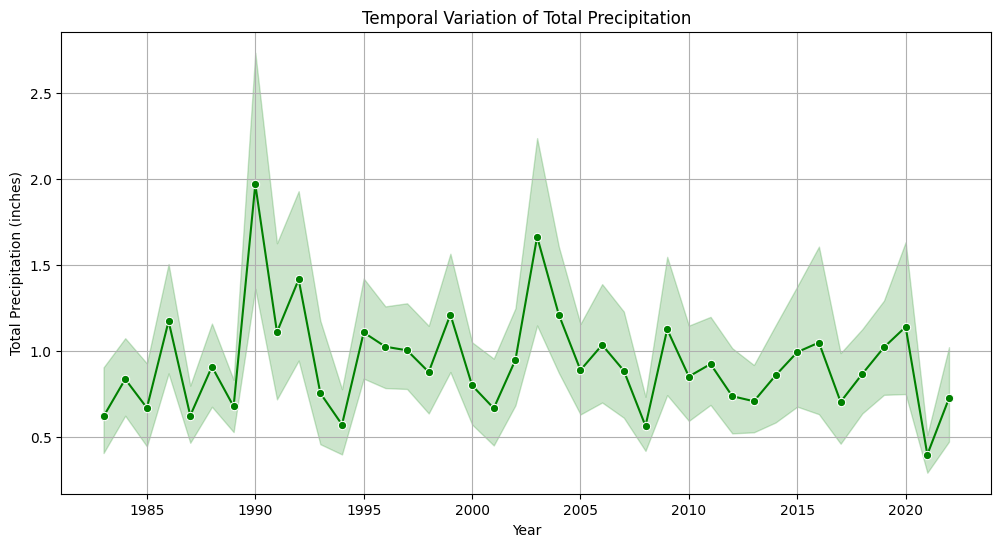

In [16]:
# Temporal precipitation variation plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Corrected_Precipitation', data=data, marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.title('Temporal Variation of Total Precipitation')
plt.grid(True)
plt.savefig('../plots/Precipitation_Temporal_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

**Temporal Precipitation Analysis:**

This graph illustrates the variations in average precipitation, which generally ranges between 0.6 and 1.6 inches, with two notable exceptions: 1990, where precipitation reached 2.0 inches, and 2003, with 1.6 inches. These spikes indicate years with significantly higher rainfall than the typical range.

#### Monthly Variation of Precipitation:

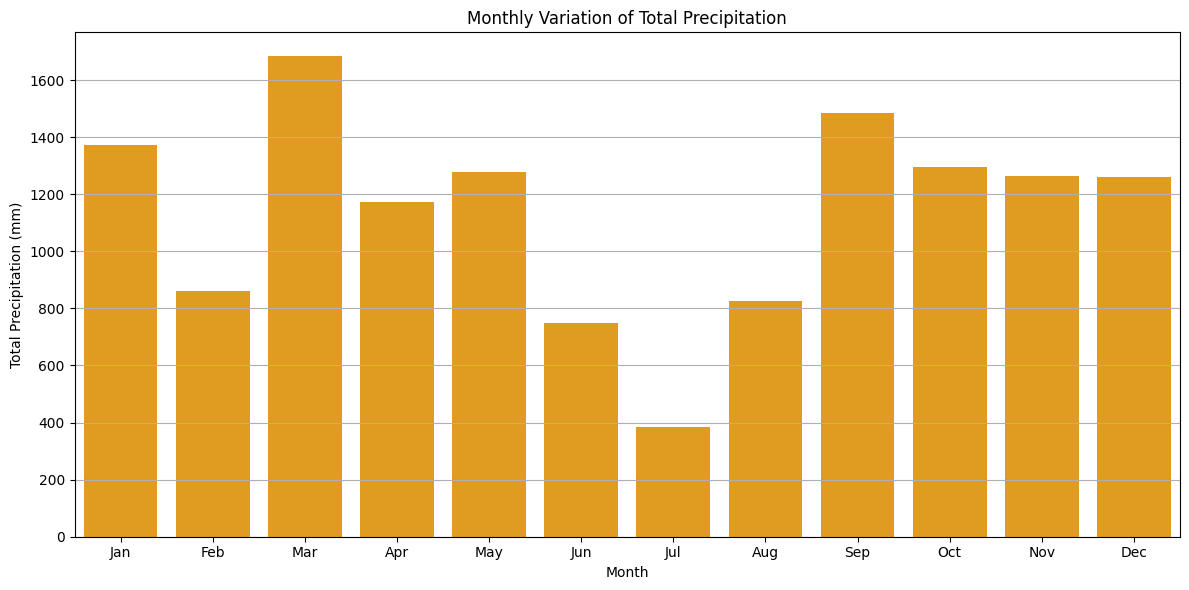

In [17]:
# Calculate monthly total precipitation
monthly_precipitation = data.groupby('Month').agg({
    'Corrected_Precipitation': 'sum'
})

# Monthly precipitation variation plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_precipitation.index, y='Corrected_Precipitation', data=monthly_precipitation, color='orange')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.title('Monthly Variation of Total Precipitation')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('../plots/Precipitation_Monthly_Variation.png', dpi=300, bbox_inches='tight')
plt.show()

**Monthly Precipitation Analysis:**

This graph highlights the months with higher precipitation: December, February, and August, while the month with the least precipitation is June. This seasonal pattern shows that winter and late summer months tend to have more rainfall in Tunisia.

## Statistical Analysis

Now let's examine the correlations between different weather variables to understand their relationships.

Correlation between wind speed and precipitation: 0.10230154892938959


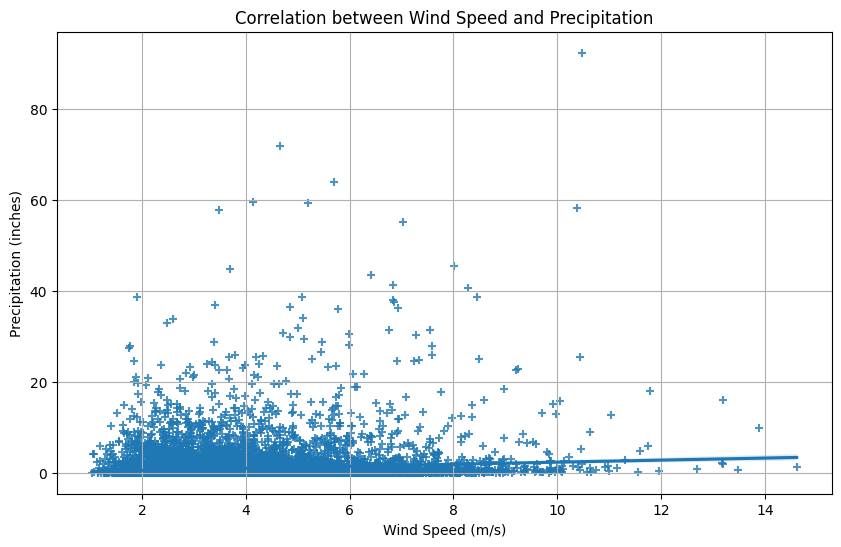

In [18]:
# Correlation between wind speed and precipitation
correlation = data['Wind_Speed_10m'].corr(data['Corrected_Precipitation'])
print("Correlation between wind speed and precipitation:", correlation)

# Create correlation plot between wind speed and precipitation
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Wind_Speed_10m', y='Corrected_Precipitation', fit_reg=True, marker='+')
plt.title('Correlation between Wind Speed and Precipitation')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.savefig('../plots/Wind_Precipitation_Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

Correlation between temperature and relative humidity: -0.7285381688341576


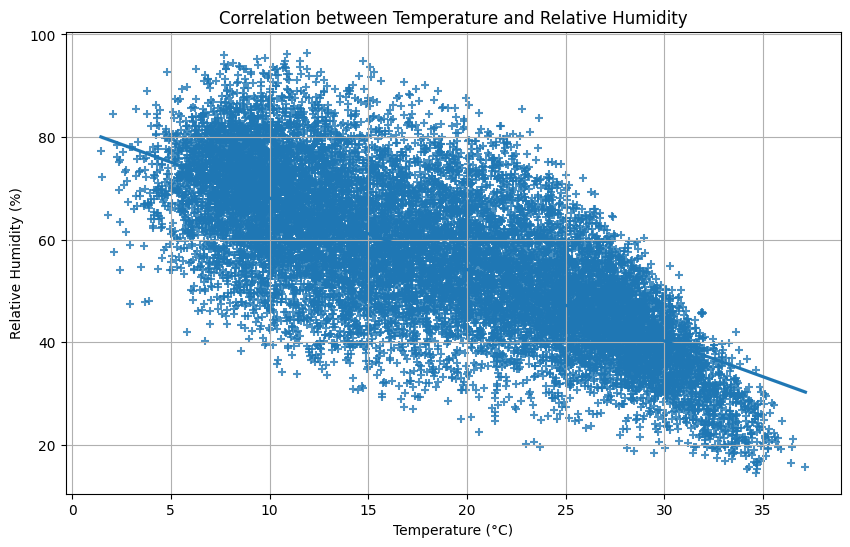

In [19]:
# Correlation between temperature and relative humidity
correlation = data['Temperature_2m'].corr(data['Relative_Humidity_2m'])
print("Correlation between temperature and relative humidity:", correlation)

# Create correlation plot between temperature and relative humidity
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Temperature_2m', y='Relative_Humidity_2m', fit_reg=True, marker="+")
plt.title('Correlation between Temperature and Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.savefig('../plots/Temperature_Humidity_Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

Correlation between wind speed and wind direction: 0.2519582000988491


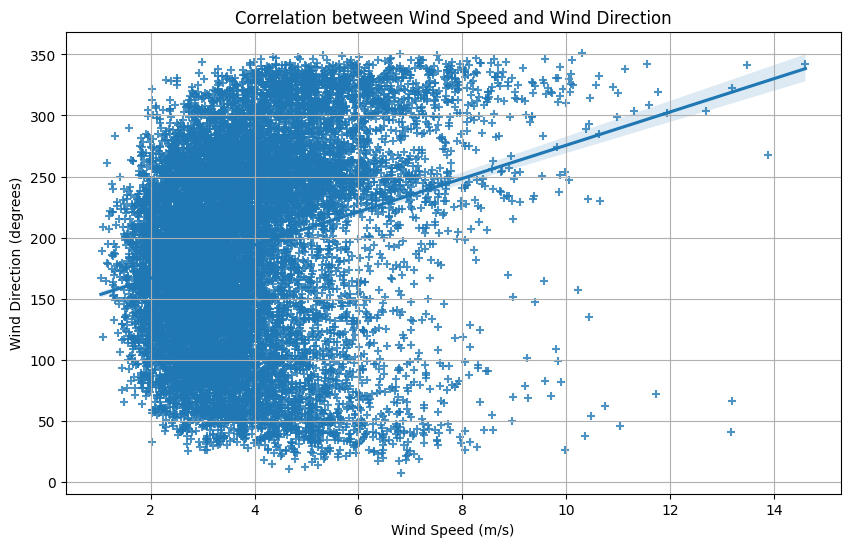

In [20]:
# Correlation between wind speed and wind direction
correlation = data['Wind_Speed_10m'].corr(data['Wind_Direction_10m'])
print("Correlation between wind speed and wind direction:", correlation)

# Create correlation plot between wind speed and wind direction
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Wind_Speed_10m', y='Wind_Direction_10m', fit_reg=True, marker="+")
plt.title('Correlation between Wind Speed and Wind Direction')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.savefig('../plots/Wind_Speed_Direction_Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

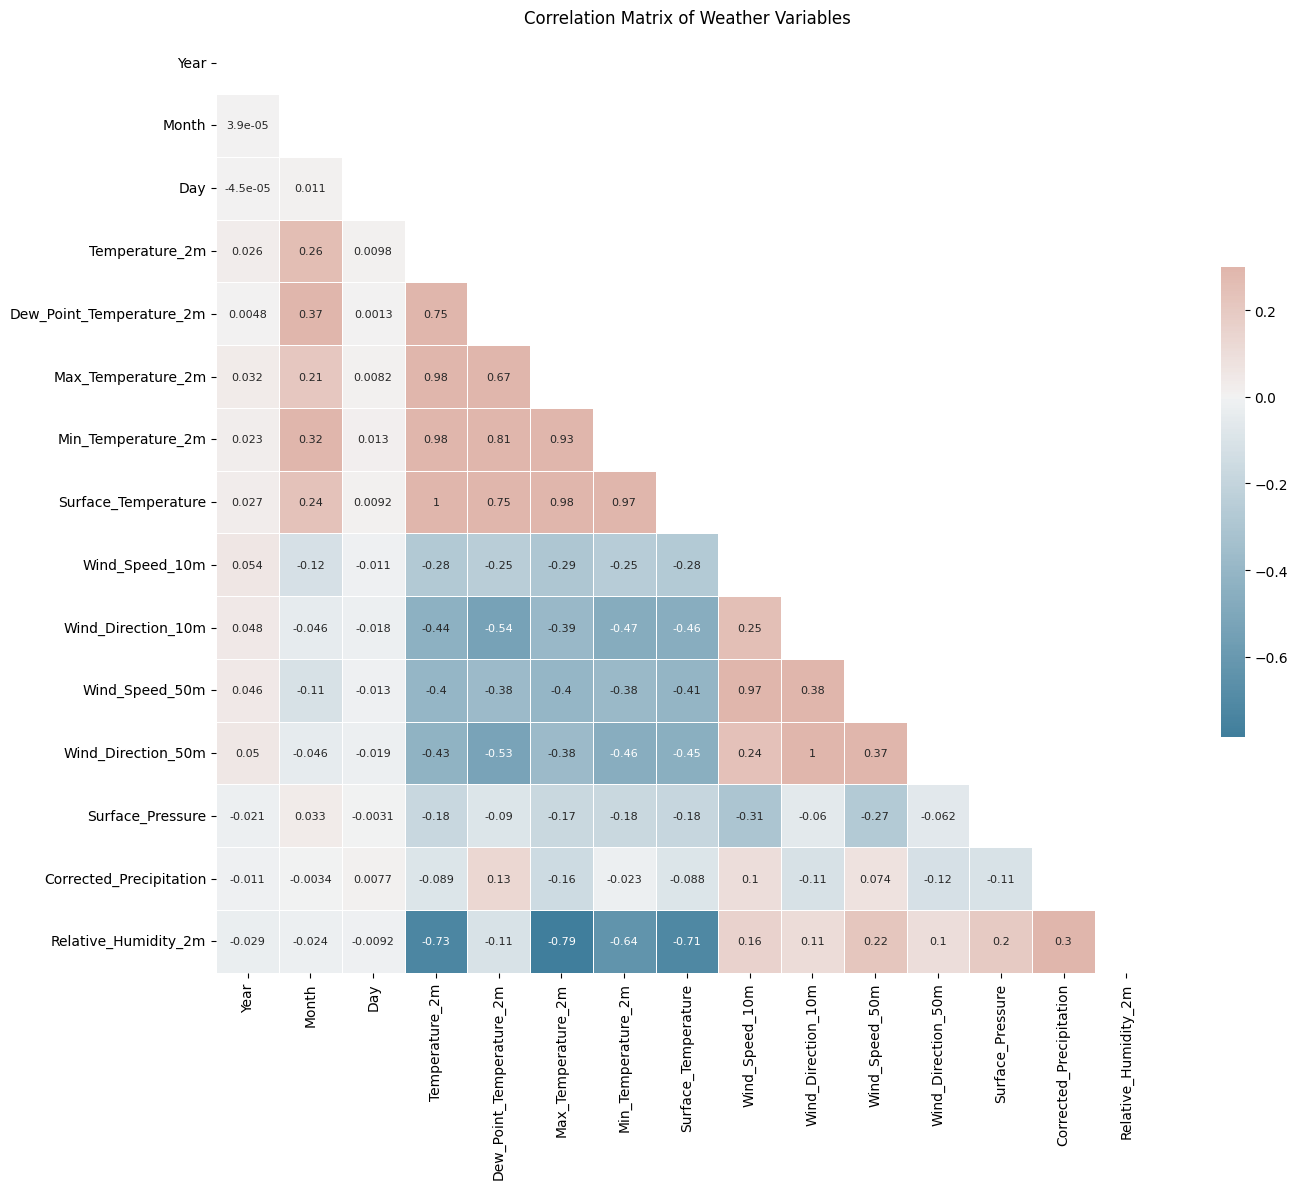

In [22]:
# Correlation Matrix
import numpy as np

# drop the season column
data = data.drop(columns=['season'])

# Calculate the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, annot_kws={"size": 8})

plt.title('Correlation Matrix of Weather Variables')
plt.tight_layout()
plt.savefig('../plots/Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Key Findings from Correlation Analysis:

1. **Wind Speed and Precipitation**: There is a weak positive correlation between wind speed and precipitation, suggesting that higher wind speeds are slightly associated with more rainfall.

2. **Temperature and Relative Humidity**: There is a strong negative correlation between temperature and relative humidity, indicating that as temperature increases, relative humidity tends to decrease.

3. **Wind Speed and Wind Direction**: There is a weak positive correlation between wind speed and wind direction, suggesting some relationship between the speed and direction of wind patterns.

4. **Correlation Matrix**: This comprehensive matrix shows the relationships between all weather variables, highlighting both strong and weak correlations that can help us understand the complex interactions in Tunisia's climate system.

## Conclusion

This exploratory data analysis of Tunisia's weather data from 1983 to 2023 reveals several important insights:

- **Temperature Trends**: Tunisia has experienced noticeable temperature variations over the years, with some periods showing increasing trends, particularly in maximum temperatures.

- **Seasonal Patterns**: Clear seasonal variations exist in temperature, wind speed, atmospheric pressure, and precipitation, following expected Mediterranean climate patterns.

- **Extreme Weather**: Heat waves (temperatures above 35°C) show varying frequency across years, with some years experiencing significantly more extreme heat events.

- **Wind Patterns**: Wind speeds remain relatively stable with some seasonal variation, being highest in winter months.

- **Precipitation Patterns**: Rainfall shows high variability between years and follows seasonal patterns with higher precipitation in winter and lower in summer months.

- **Variable Relationships**: Strong correlations exist between temperature and humidity, while other relationships like wind speed and precipitation show weaker correlations.

This analysis provides a comprehensive overview of Tunisia's climate patterns and can serve as a foundation for understanding long-term climate trends and informing future climate studies.